## Environment

In [99]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

## Importing Dataset

In [68]:
# Importing dataset:
df44_encoded = pd.read_csv('../Data/df44_encoded.csv')

In [69]:
df44_encoded.head()

,sex_female,ticket_CA,ticket_Numeric,ticket_Other,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,embarked_C,embarked_Q,agebins_Adult,agebins_Child,agebins_Old,agebins_Teen
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
# Importing dataset:
df44_scaled = pd.read_csv('../Data/df44_scaled.csv')

In [71]:
df44_scaled.head()

,Fare_s,SibSp_s,Parch_s,Name_S,Age_mean_s
0,-0.502445,0.432793,-0.473674,-0.427451,-0.597055
1,0.786845,0.432793,-0.473674,2.590962,0.634162
2,-0.488854,-0.474545,-0.473674,-0.535252,-0.289251
3,0.420730,0.432793,-0.473674,1.836359,0.403309
4,-0.486337,-0.474545,-0.473674,-0.319651,0.403309


In [72]:
# Importing dataset:
df44_untouched = pd.read_csv('../Data/df44_untouched.csv')

In [73]:
df44_untouched.head()

,Pclass,Survived,Age_plus_18,Age_plus_50
0,3,0,1,0
1,1,1,1,0
2,3,1,1,0
3,1,1,1,0
4,3,0,1,0


In [19]:
df44_untouched = df44_untouched[['Survived','Pclass','Age_plus_18','Age_plus_50']]


In [20]:
df44_untouched.head()

,Survived,Pclass,Age_plus_18,Age_plus_50
0,0,3,1,0
1,1,1,1,0
2,1,3,1,0
3,1,1,1,0
4,0,3,1,0


In [22]:
df52 = df44_untouched.join(df44_encoded).join(df44_scaled)

In [23]:
df52.head()

,Survived,Pclass,Age_plus_18,Age_plus_50,sex_female,ticket_CA,ticket_Numeric,ticket_Other,cabin_A,cabin_B,...,embarked_Q,agebins_Adult,agebins_Child,agebins_Old,agebins_Teen,Fare_s,SibSp_s,Parch_s,Name_S,Age_mean_s
0,0,3,1,0,0,0,0,1,0,0,...,0,1,0,0,0,-0.502445,0.432793,-0.473674,-0.427451,-0.597055
1,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0.786845,0.432793,-0.473674,2.590962,0.634162
2,1,3,1,0,1,0,0,1,0,0,...,0,1,0,0,0,-0.488854,-0.474545,-0.473674,-0.535252,-0.289251
3,1,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0.420730,0.432793,-0.473674,1.836359,0.403309
4,0,3,1,0,0,0,1,0,0,0,...,0,1,0,0,0,-0.486337,-0.474545,-0.473674,-0.319651,0.403309


In [24]:
df52.columns

Index(['Survived', 'Pclass', 'Age_plus_18', 'Age_plus_50', 'sex_female',
       'ticket_CA', 'ticket_Numeric', 'ticket_Other', 'cabin_A', 'cabin_B',
       'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_T',
       'embarked_C', 'embarked_Q', 'agebins_Adult', 'agebins_Child',
       'agebins_Old', 'agebins_Teen', 'Fare_s', 'SibSp_s', 'Parch_s', 'Name_S',
       'Age_mean_s'],
      dtype='object')

In [27]:
df52 = df52[['Pclass', 'sex_female',
       'ticket_CA', 'ticket_Numeric', 'ticket_Other', 'cabin_A', 'cabin_B',
       'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_T',
       'embarked_C', 'embarked_Q', 'agebins_Adult', 'agebins_Child',
       'agebins_Old', 'agebins_Teen', 'Fare_s', 'SibSp_s', 'Parch_s', 'Name_S','Survived']]

In [28]:
df52.head()

,Pclass,sex_female,ticket_CA,ticket_Numeric,ticket_Other,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,...,embarked_Q,agebins_Adult,agebins_Child,agebins_Old,agebins_Teen,Fare_s,SibSp_s,Parch_s,Name_S,Survived
0,3,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,-0.502445,0.432793,-0.473674,-0.427451,0
1,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0.786845,0.432793,-0.473674,2.590962,1
2,3,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,-0.488854,-0.474545,-0.473674,-0.535252,1
3,1,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0.420730,0.432793,-0.473674,1.836359,1
4,3,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,-0.486337,-0.474545,-0.473674,-0.319651,0


## Separate the DF in train and test

In [29]:
X = df52.iloc[:,:-1]
y = df52.iloc[:,-1:]

Test size 20% 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Model Creation

### RANDOM FOREST

In [36]:
rfc = RandomForestClassifier(random_state=10)


#### Grid Search CV

In [41]:
param_grid = { 
    'n_estimators': [10, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy'],
}


In [42]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [43]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

Best Parameters

In [46]:
CV_rfc.best_params_['criterion']

'entropy'

In [47]:
rfc_best=RandomForestClassifier(random_state=10, max_features=CV_rfc.best_params_['max_features'], n_estimators=CV_rfc.best_params_['n_estimators'], max_depth=CV_rfc.best_params_['max_depth'], criterion=CV_rfc.best_params_['criterion'])


In [48]:
rfc_best.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [93]:
rfc_best.score(X_train, y_train)

0.8932584269662921

In [94]:
rfc_best.score(X_test, y_test)

0.8379888268156425

#### Predict

In [89]:
pred=rfc_best.predict(X_test)

#### Accuracy

In [90]:
def accuracy_class(y_test,pred):
    ''' 
    This fuction print the accuracy for a clasification ml model
    INPUT: y_test, y_predict
    OUTPUT: acuracy tests
    '''
    accuracy = accuracy_score(y_test,pred)
    f1 = f1_score(y_test, pred)                
    return print(f'ACURACY = {accuracy}\nF1= {f1}')

In [92]:
#TRAIN 
accuracy_class(y_train,X_pred)         

ACURACY = 0.8932584269662921
F1= 0.8515625000000001


In [82]:
accuracy_class(y_test,pred)         

ACURACY = 0.8379888268156425
F1= 0.7603305785123968


In [83]:
cm = confusion_matrix(y_test, pred)
cm

array([[104,  13],
       [ 16,  46]])

In [98]:
roc_auc_score(y_test, pred)

0.8154121863799283

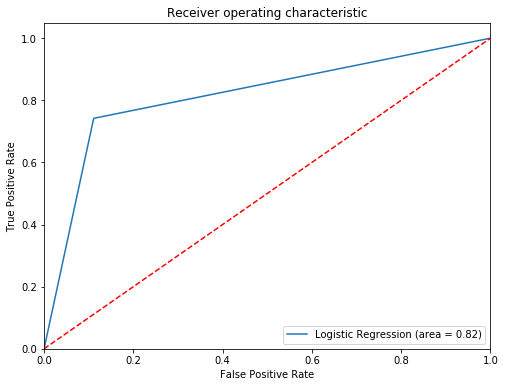

In [100]:

logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### RANDOM SVC